<img src="./logo_UNSAM.jpg" align="right" width="250" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº9
#### Nicolás Sewrjugin y Sofía Gervasi


# Introducción

Existen diferentes técnicas para la eliminación del movimiento de línea de base en señales electrocardiográficas (*ECG*), una interferencia de muy baja frecuencia (típicamente $<0.5\,\text{Hz}$) que distorsiona la morfología del registro y dificulta la detección de los complejos QRS. El objetivo consiste en obtener una señal filtrada $\hat{x}(n)$, a partir de la señal contaminada $s(n)$, mediante la relación:
\begin{equation}
\hat{x}(n) = s(n) - \hat{b}(n),
\end{equation}
donde $\hat{b}(n)$ es la estimación del desplazamiento de línea de base. 

La primera técnica analizada es el filtrado de mediana, un método no lineal que reemplaza cada muestra por el valor central de una ventana ordenada. Esta propiedad lo hace especialmente eficaz para preservar transiciones abruptas como los complejos *QRS*, mientras atenúa variaciones lentas. En este trabajo, se aplica en dos etapas temporales consecutivas de $200\,\text{ms}$ y $600\,\text{ms}$, resultando en
\begin{equation}
\hat{b}(n) = \mathrm{med}_{600}\big(\mathrm{med}_{200}(s(n))\big),
\end{equation}
donde $\mathrm{med}_{t}(\cdot)$ denota el operador de mediana en una ventana de duración $t$. 

La segunda técnica emplea interpolación mediante splines cúbicos, que construyen una función suave, continua hasta la tercera derivada y ajustada a un conjunto de puntos donde la señal se considera libre de actividad eléctrica significativa (segmento *PQ*). A partir de las detecciones de cada latido, se forma el conjunto
\begin{equation}
S = \{(m_i,\, s(m_i))\}, \qquad m_i = n_i - n_0,
\end{equation}
y luego se interpola mediante una función spline cúbica que genera una señal continua muestreada a la misma frecuencia que el *ECG*:
\begin{equation}
\hat{b}(n) = \mathrm{spline}_3(S,n).
\end{equation}

Además, una vez habiendo eliminado el movimiento de línea de base de la señal, también resulta interesante el hecho de poder detectar correctamente el complejo *QRS* (es decir, los latidos), parte fundamental para el análisis del *ECG*. Para esto, se puede utilizar un filtro adaptado como una técnica adecuada, la cual consiste en un sistema diseñado para maximizar la correlación entre la señal de entrada y un patrón conocido. En el contexto del *ECG*, ese patrón corresponde a la forma típica de un complejo QRS. Cuando el filtro recibe la señal, produce un pico de salida en los instantes donde la señal se parece al patrón, permitiendo así detectar los latidos de manera robusta.



# Análisis y desarrollo



### Filtro de mediana

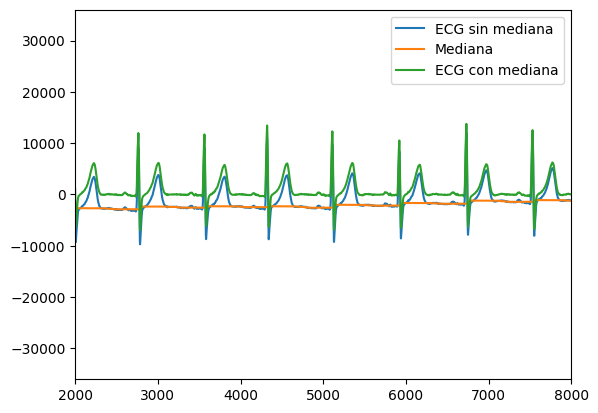

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import interpolate as inter

#ECG
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = mat_struct['ecg_lead'].flatten()
N = len(ecg_one_lead)
cant_muestras = N

ECG_med200 = signal.medfilt(ecg_one_lead, 199) #debe ser impar el kernel size pq no hay mediana de algo impar y me conviene para q el retardo sea entero (si fuera lineal)
ECG_med600 = signal.medfilt(ECG_med200, 599)

ECG_sb = ecg_one_lead-ECG_med600

plt.figure(1)
plt.plot(ecg_one_lead, label = 'ECG sin mediana')
plt.plot(ECG_med600, label = 'Mediana')
plt.plot(ECG_sb, label = 'ECG con mediana')
plt.xlim(2000, 8000)
plt.legend()


### Interpolación mediante spline cúbico

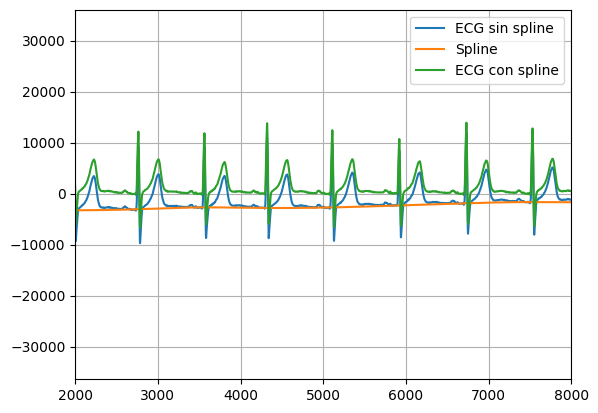

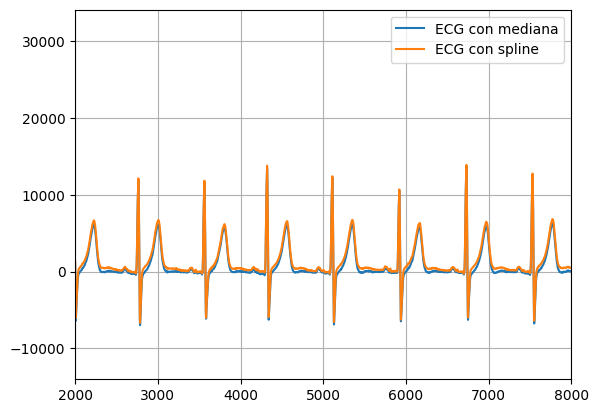

In [2]:
fs = 1000

qrs_detections = mat_struct['qrs_detections'].flatten()
n0 = int(0.08*fs)
mi = qrs_detections-n0

sm = ecg_one_lead[mi]

sc = inter.CubicSpline(mi,sm)

sb = sc(np.arange(N))

ECG_sb2 = ecg_one_lead-sb

plt.figure(2)
plt.plot(ecg_one_lead, label = 'ECG sin spline')
plt.plot(sb, label = 'Spline')
plt.plot(ECG_sb2, label = 'ECG con spline')
plt.xlim(2000, 8000)
plt.grid(True)
plt.legend()

plt.figure(3)
plt.plot(ECG_sb, label = 'ECG con mediana')
plt.plot(ECG_sb2, label = 'ECG con spline')
plt.xlim(2000, 8000)
plt.grid(True)
plt.legend()


# Conclusiones


